In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_excel("Glucose_Abhishek_ML.xlsx")
df

,Glucose_mM,Intensity_RLU
0,0.1,31.10
1,0.1,31.27
2,0.1,31.45
3,0.1,33.80
4,0.1,33.50
...,...,...
95,1.0,116.33
96,1.0,113.75
97,1.0,112.25
98,1.0,110.00


In [4]:
x =df.drop(["Glucose_mM"], axis=1)
y = df["Glucose_mM"]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

# AdaBoost

In [20]:
Adaboost_model = AdaBoostRegressor()
# Adaboost_model = LinearRegression()
Adaboost_model.fit(x_train, y_train)
# x_test
type(x_test)
x_test.shape

(20, 1)

In [16]:
y_pred_Adaboost = Adaboost_model.predict(x_test)
y_pred_Adaboost = Adaboost_model.predict([[52.1]])
y_pred_Adaboost

array([0.3])

In [9]:
MAE_Adaboost = mean_absolute_error(y_test,y_pred_Adaboost)
print("MAE for Adaboost:",MAE_Adaboost)
MSE_Adaboost = mean_squared_error(y_test,y_pred_Adaboost)
print("MSE for Adaboost:",MSE_Adaboost)
RMSE_Adaboost = np.sqrt(MSE_Adaboost)
print("RMSE for Adaboost:",RMSE_Adaboost)
r_score_Adaboost = r2_score(y_test,y_pred_Adaboost)
print("R Score Adaboost:",r_score_Adaboost)

MAE for Adaboost: 0.014103859103859117
MSE for Adaboost: 0.0008166278501683857
RMSE for Adaboost: 0.02857670117715454
R Score Adaboost: 0.989380652143454


# Tensorflow testing

In [ ]:
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt


In [ ]:
# np.random.seed(101)
# tf.set_random_seed(101)


In [ ]:
# df = pd.read_excel("Glucose_Abhishek_ML.xlsx")
# x = df.drop(["Glucose_mM"], axis=1)
# y = df["Glucose_mM"]

In [ ]:
# W = tf.Variable(np.random.randn(), name = "W")
# b = tf.Variable(np.random.randn(), name = "b")
# learning_rate = 0.01
# training_epochs = 1000


In [ ]:
# # Hypothesis
# y_pred = tf.add(tf.multiply(X, W), b)

# # Mean Squared Error Cost Function
# cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)

# # Gradient Descent Optimizer
# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# # Global Variables Initializer
# init = tf.global_variables_initializer()


In [ ]:
# # Starting the Tensorflow Session
# with tf.Session() as sess:
	
# 	# Initializing the Variables
# 	sess.run(init)
	
# 	# Iterating through all the epochs
# 	for epoch in range(training_epochs):
		
# 		# Feeding each data point into the optimizer using Feed Dictionary
# 		for (_x, _y) in zip(x, y):
# 			sess.run(optimizer, feed_dict = {X : _x, Y : _y})
		
# 		# Displaying the result after every 50 epochs
# 		if (epoch + 1) % 50 == 0:
# 			# Calculating the cost a every epoch
# 			c = sess.run(cost, feed_dict = {X : x, Y : y})
# 			print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
	
# 	# Storing necessary values to be used outside the Session
# 	training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
# 	weight = sess.run(W)
# 	bias = sess.run(b)


In [ ]:
# # Calculating the predictions
# predictions = weight * x + bias
# print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')


In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [25]:
df = pd.read_excel("Glucose_Abhishek_ML.xlsx")
df
x =df.drop(["Glucose_mM"], axis=1)
y = df["Glucose_mM"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

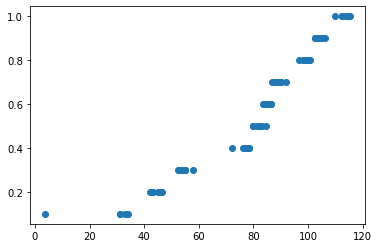

In [36]:
learning_rate = 0.01

# Number of loops for training through all your data to update the parameters
training_epochs = 10

# the training dataset
# x_train = np.linspace(0, 10, 100)
# y_train = x_train + np.random.normal(0,1,100)

# plot of data
plt.scatter(x_train, y_train)


In [37]:
weight = tf.Variable(0.)
bias = tf.Variable(0.)

def linreg(x):
    y = weight*x + bias
    return y

def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))





In [42]:
for epoch in range(training_epochs):

# Compute loss within Gradient Tape context
    with tf.GradientTape() as tape:
        y_predicted = linreg(x_train)
        loss = squared_error(y_predicted, y_train)

        # Get gradients
        gradients = tape.gradient(loss, [weight,bias])

        # Adjust weights
        weight.assign_sub(gradients[0]*learning_rate)
        bias.assign_sub(gradients[1]*learning_rate)

        # Print output
        print(f"Epoch count {epoch}: Loss value: {loss.numpy()}")

Epoch count 0: Loss value: nan
Epoch count 1: Loss value: nan
Epoch count 2: Loss value: nan
Epoch count 3: Loss value: nan
Epoch count 4: Loss value: nan
Epoch count 5: Loss value: nan
Epoch count 6: Loss value: nan
Epoch count 7: Loss value: nan
Epoch count 8: Loss value: nan
Epoch count 9: Loss value: nan


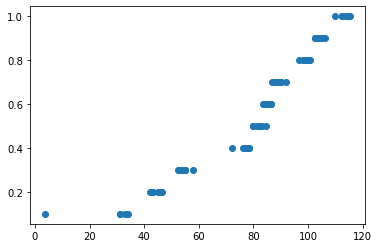

In [43]:
plt.scatter(x_train, y_train)
plt.plot(x_train, linreg(x_train), 'r')
plt.show()

In [99]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [100]:
df = pd.read_excel("Glucose_Abhishek_ML.xlsx")
df
x =df.drop(["Glucose_mM"], axis=1)
y = df["Glucose_mM"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [145]:
model = Sequential()
# model.add(Dense(15, input_dim=11, activation='relu'))
# model.add(Dense(1, activation='linear'))tf_model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(1))
# model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'accuracy'])

model.layers[0].weights[0].assign(Adaboost_model.coef_.transpose())
model.layers[0].bias.assign(Adaboost_model.intercept_)


ValueError: Cannot assign value to variable ' dense_33/kernel:0': Shape mismatch.The variable shape (1, 1), and the assigned value shape (1,) are incompatible.

In [123]:
history = model.fit(x_train, y_train,
          batch_size=1,
          epochs=200,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0203 - mse: 0.0203 - mae: 0.1035 - accuracy: 0.1000 - val_loss: 0.0242 - val_mse: 0.0242 - val_mae: 0.1156 - val_accuracy: 0.1000
Epoch 2/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0203 - mse: 0.0203 - mae: 0.1033 - accuracy: 0.1000 - val_loss: 0.0241 - val_mse: 0.0241 - val_mae: 0.1155 - val_accuracy: 0.1000
Epoch 3/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0202 - mse: 0.0202 - mae: 0.1046 - accuracy: 0.1000 - val_loss: 0.0240 - val_mse: 0.0240 - val_mae: 0.1153 - val_accuracy: 0.1000
Epoch 4/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0201 - mse: 0.0201 - mae: 0.1026 - accuracy: 0.1000 - val_loss: 0.0239 - val_mse: 0.0239 - val_mae: 0.1151 - val_accuracy: 0.1000
Epoch 5/200
80/80 [==============================] - 0s 2ms/step - loss: 0.0201 - mse: 0.0201 - mae: 0.1033 - accuracy: 0.1000 - val_loss: 0.0238 - val_mse: 0.0238 - val_mae: 0.115

In [124]:
model.evaluate(x_test, y_test, batch_size=1)

20/20 [==============================] - 0s 1ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0589 - accuracy: 0.1000        


[0.005141525994986296,
 0.005141525994986296,
 0.05887022614479065,
 0.10000000149011612]

In [125]:
y_pred = model.predict(x_test).flatten


1/1 [==============================] - 0s 44ms/step


In [126]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[-1])

1/1 [==============================] - 0s 120ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0589 - accuracy: 0.1000
Test loss: 0.005141526460647583
Test accuracy: 0.10000000149011612
